## Import Libraries and Setup

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Wine Quality Dataset (White Wine)

In [9]:
wine_data = pd.read_csv('winequality-white.csv', sep=';')

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {wine_data.shape}")
print(f"\nFirst few rows:")
print(wine_data.head())

wine_features = wine_data.iloc[:, :-1].values  
wine_labels = wine_data['quality'].values  
    


print(f"\nFeatures shape: {wine_features.shape}")
print(f"Labels shape: {wine_labels.shape}")
print(f"Unique quality scores: {np.unique(wine_labels)}")
print(f"Class distribution:")
for label in np.unique(wine_labels):
    count = np.sum(wine_labels == label)
    print(f"  Quality {label}: {count} samples ({count/len(wine_labels)*100:.2f}%)")

Dataset loaded successfully!
Dataset shape: (4898, 12)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  qu

## Load Human Activity Recognition Dataset

In [10]:
X_train = np.loadtxt('UCI HAR Dataset/train/X_train.txt')
y_train = np.loadtxt('UCI HAR Dataset/train/y_train.txt')

X_test = np.loadtxt('UCI HAR Dataset/test/X_test.txt')
y_test = np.loadtxt('UCI HAR Dataset/test/y_test.txt')

har_features = np.vstack([X_train, X_test])
har_labels = np.concatenate([y_train, y_test]).astype(int)

print(f"\nHAR Dataset loaded successfully!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Total samples: {har_features.shape[0]}")
print(f"Number of features: {har_features.shape[1]}")
print(f"Unique activities: {np.unique(har_labels)}")

har_loaded = True


print(f"\nClass distribution:")
for label in np.unique(har_labels):
    count = np.sum(har_labels == label)
    print(f"  Activity {label}: {count} samples ({count/len(har_labels)*100:.2f}%)")


HAR Dataset loaded successfully!
Training samples: 7352
Test samples: 2947
Total samples: 10299
Number of features: 561
Unique activities: [1 2 3 4 5 6]

Class distribution:
  Activity 1: 1722 samples (16.72%)
  Activity 2: 1544 samples (14.99%)
  Activity 3: 1406 samples (13.65%)
  Activity 4: 1777 samples (17.25%)
  Activity 5: 1906 samples (18.51%)
  Activity 6: 1944 samples (18.88%)


## Implement Parameter Estimation Functions

In [11]:
def estimate_class_parameters(X, y):
    classes = np.unique(y)
    n_samples = len(y)
    
    means = {}
    covs = {}
    priors = {}
    
    for c in classes:
        X_c = X[y == c]
        n_c = len(X_c)
        priors[c] = n_c / n_samples
        means[c] = np.mean(X_c, axis=0)
        covs[c] = np.cov(X_c, rowvar=False)
    
    return means, covs, priors

print("Parameter estimation function implemented!")

Parameter estimation function implemented!


## Implement Covariance Regularization

In [12]:
def regularize_covariance(cov, alpha=0.01):
    eigenvalues = np.linalg.eigvalsh(cov)
    min_eigenvalue = np.min(eigenvalues)
    max_eigenvalue = np.max(eigenvalues)

    if min_eigenvalue < 1e-10:
        condition_number = np.inf
    else:
        condition_number = max_eigenvalue / min_eigenvalue
    
    trace = np.trace(cov)
    rank = np.linalg.matrix_rank(cov)
    lambda_reg = alpha * trace / rank
    
    cov_reg = cov + lambda_reg * np.eye(cov.shape[0])
    
    return cov_reg, lambda_reg, condition_number

print("Covariance regularization function implemented!")

Covariance regularization function implemented!


## Estimate Parameters for Wine Quality Dataset

In [13]:
wine_means, wine_covs, wine_priors = estimate_class_parameters(
    wine_features, wine_labels
)


wine_covs_reg = {}
alpha = 0.01

for c in wine_covs.keys():
    cov_reg, lambda_reg, condition_num = regularize_covariance(
        wine_covs[c], alpha=alpha
    )
    wine_covs_reg[c] = cov_reg
    
    print(f"Class {c}:")
    print(f"  Original condition number: {condition_num:.2e}")
    print(f"  Regularization λ: {lambda_reg:.6f}")
    
    eigenvalues_reg = np.linalg.eigvalsh(cov_reg)
    condition_num_reg = np.max(eigenvalues_reg) / np.min(eigenvalues_reg)
    print(f"  Regularized condition number: {condition_num_reg:.2e}")

Class 3:
  Original condition number: 5.81e+10
  Regularization λ: 14.967215
  Regularized condition number: 1.00e+03
Class 4:
  Original condition number: 7.58e+09
  Regularization λ: 2.925798
  Regularized condition number: 1.02e+03
Class 5:
  Original condition number: 1.05e+10
  Regularization λ: 2.093394
  Regularized condition number: 1.01e+03
Class 6:
  Original condition number: 4.24e+09
  Regularization λ: 1.800849
  Regularized condition number: 1.00e+03
Class 7:
  Original condition number: 8.13e+09
  Regularization λ: 1.152891
  Regularized condition number: 9.83e+02
Class 8:
  Original condition number: 1.36e+10
  Regularization λ: 1.247752
  Regularized condition number: 9.70e+02
Class 9:
  Original condition number: inf
  Regularization λ: 1.473629
  Regularized condition number: 2.75e+02


## Implement MAP Classifier

In [14]:
def map_classify(X, means, covs, priors):
    n_samples = X.shape[0]
    classes = list(means.keys())
    n_classes = len(classes)
    
    log_posteriors = np.zeros((n_samples, n_classes))
    
    for i, c in enumerate(classes):
        try:
            rv = multivariate_normal(mean=means[c], cov=covs[c], 
                                     allow_singular=True)
            
            log_likelihood = rv.logpdf(X)
            
            log_posteriors[:, i] = log_likelihood + np.log(priors[c])
        except:
            log_posteriors[:, i] = -np.inf
    
    max_log_post = np.max(log_posteriors, axis=1, keepdims=True)
    posteriors = np.exp(log_posteriors - max_log_post)
    posteriors = posteriors / np.sum(posteriors, axis=1, keepdims=True)
    
    predictions = np.array([classes[i] for i in np.argmax(posteriors, axis=1)])
    
    return predictions, posteriors

print("MAP classifier implemented!")

MAP classifier implemented!


## Classify Wine Quality Dataset

In [15]:
wine_predictions, wine_posteriors = map_classify(
    wine_features, wine_means, wine_covs_reg, wine_priors
)

wine_accuracy = np.mean(wine_predictions == wine_labels)
wine_error_rate = 1 - wine_accuracy

print(f"Overall Accuracy: {wine_accuracy:.4f}")
print(f"Error Rate: {wine_error_rate:.4f}")

Overall Accuracy: 0.3067
Error Rate: 0.6933


## Compute Confusion Matrix for Wine Quality

In [16]:
def compute_confusion_matrix(y_true, y_pred, normalize=True):
    classes = np.unique(y_true)
    n_classes = len(classes)
    
    confusion_matrix = np.zeros((n_classes, n_classes))
    
    for i, pred_class in enumerate(classes):
        for j, true_class in enumerate(classes):
            mask = (y_true == true_class)
            if normalize:
                total = np.sum(mask)
                if total > 0:
                    confusion_matrix[i, j] = np.sum((y_pred[mask] == pred_class)) / total
            else:
                confusion_matrix[i, j] = np.sum((y_pred == pred_class) & (y_true == true_class))
    
    return confusion_matrix, classes

wine_confusion, wine_classes = compute_confusion_matrix(
    wine_labels, wine_predictions, normalize=True
)

for c in wine_classes:
    print(f"L={c:2d}   ", end="")
print()

for i, pred_c in enumerate(wine_classes):
    print(f"D={pred_c:2d}: ", end="")
    for j, true_c in enumerate(wine_classes):
        print(f"{wine_confusion[i,j]:.3f} ", end="")
    print()

L= 3   L= 4   L= 5   L= 6   L= 7   L= 8   L= 9   
D= 3: 0.200 0.012 0.001 0.000 0.000 0.000 0.000 
D= 4: 0.000 0.000 0.001 0.000 0.000 0.000 0.000 
D= 5: 0.150 0.067 0.051 0.020 0.002 0.000 0.000 
D= 6: 0.400 0.466 0.422 0.291 0.106 0.154 0.000 
D= 7: 0.200 0.454 0.524 0.686 0.885 0.817 1.000 
D= 8: 0.050 0.000 0.002 0.002 0.007 0.029 0.000 
D= 9: 0.000 0.000 0.000 0.000 0.000 0.000 0.000 


## Visualize Wine Quality Confusion Matrix

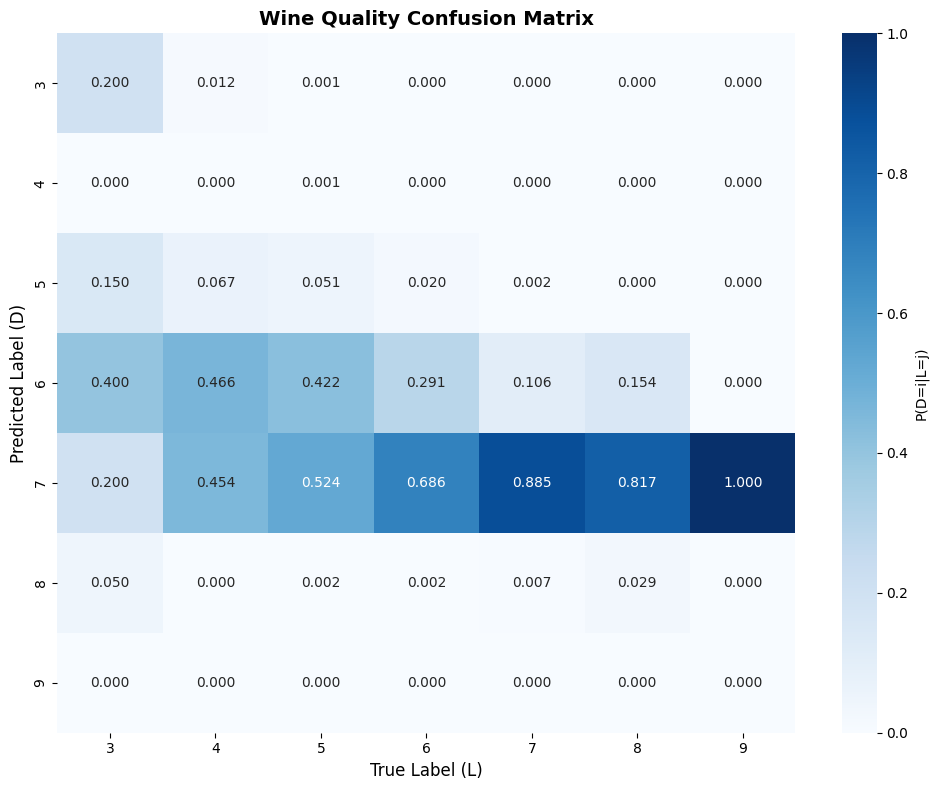

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_confusion, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=wine_classes, yticklabels=wine_classes,
            cbar_kws={'label': 'P(D=i|L=j)'})
plt.xlabel('True Label (L)', fontsize=12)
plt.ylabel('Predicted Label (D)', fontsize=12)
plt.title('Wine Quality Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## PCA Visualization for Wine Quality Dataset

Explained variance ratio (first 3 components): [0.90965734 0.07933386 0.01015427]
Cumulative explained variance: 0.9991


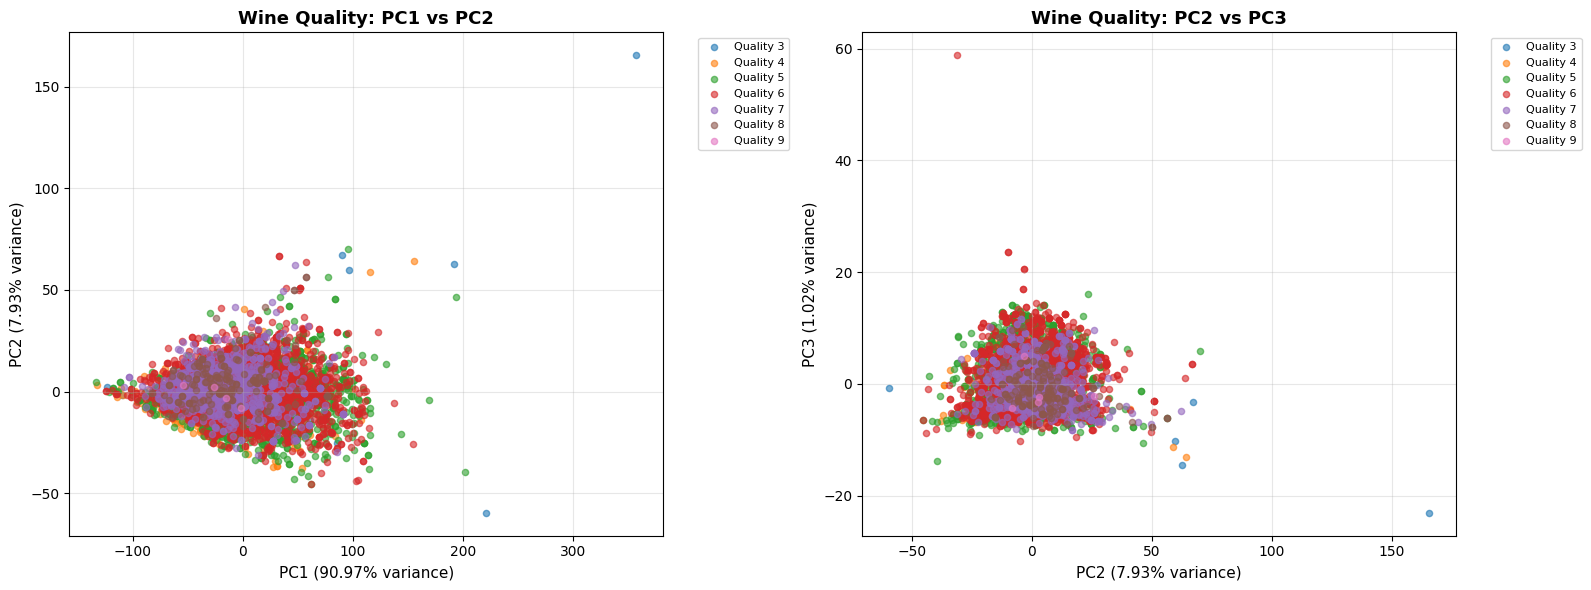

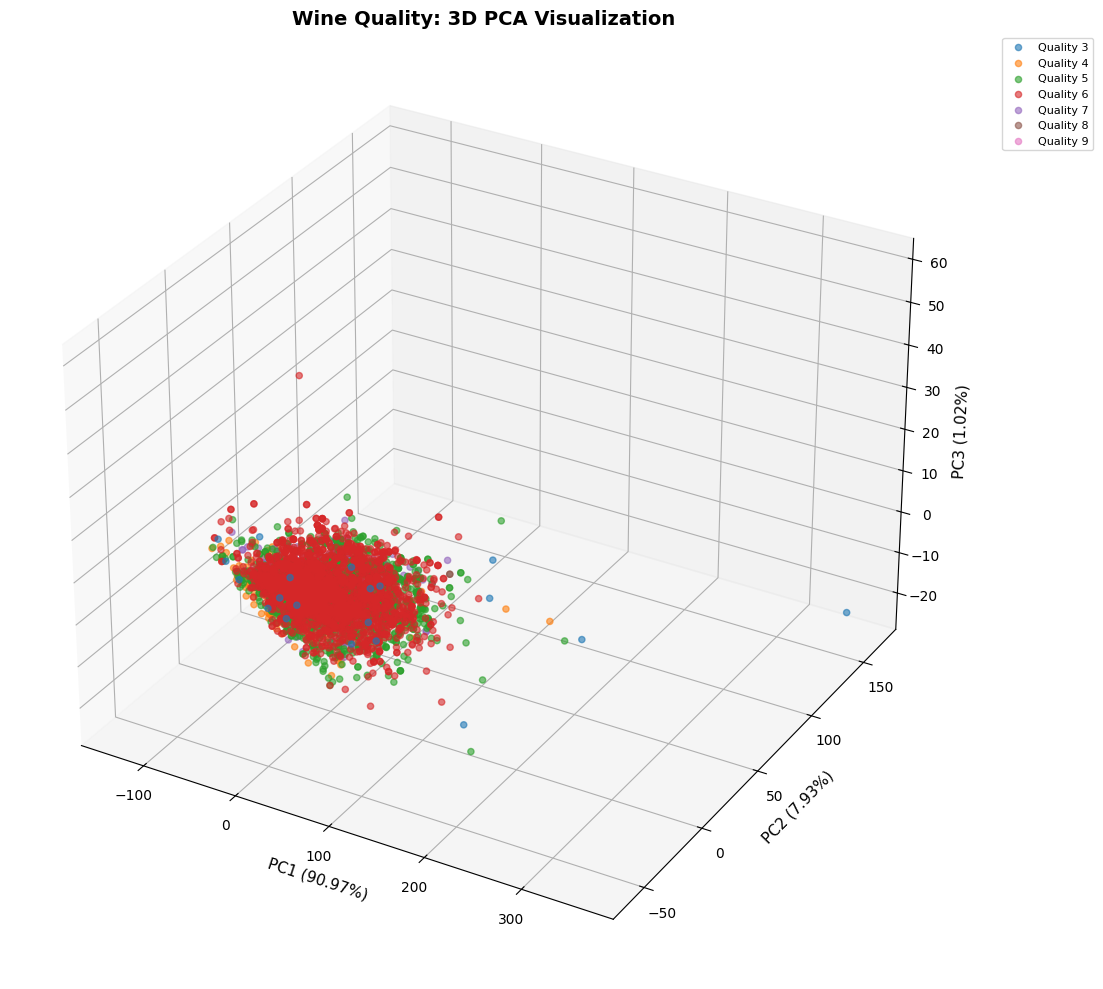

In [18]:
pca_wine = PCA(n_components=3)
wine_pca = pca_wine.fit_transform(wine_features)

print(f"Explained variance ratio (first 3 components): {pca_wine.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.sum(pca_wine.explained_variance_ratio_):.4f}")

# 2D visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PC1 vs PC2
for label in wine_classes:
    mask = wine_labels == label
    axes[0].scatter(wine_pca[mask, 0], wine_pca[mask, 1], 
                   label=f'Quality {label}', alpha=0.6, s=20)
axes[0].set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[0].set_title('Wine Quality: PC1 vs PC2', fontsize=13, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3)

# PC2 vs PC3
for label in wine_classes:
    mask = wine_labels == label
    axes[1].scatter(wine_pca[mask, 1], wine_pca[mask, 2], 
                   label=f'Quality {label}', alpha=0.6, s=20)
axes[1].set_xlabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[1].set_ylabel(f'PC3 ({pca_wine.explained_variance_ratio_[2]:.2%} variance)', fontsize=11)
axes[1].set_title('Wine Quality: PC2 vs PC3', fontsize=13, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3D visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for label in wine_classes:
    mask = wine_labels == label
    ax.scatter(wine_pca[mask, 0], wine_pca[mask, 1], wine_pca[mask, 2],
              label=f'Quality {label}', alpha=0.6, s=20)

ax.set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.2%})', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.2%})', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_wine.explained_variance_ratio_[2]:.2%})', fontsize=11)
ax.set_title('Wine Quality: 3D PCA Visualization', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.15, 1), fontsize=8)
plt.tight_layout()
plt.show()

## Estimate Parameters for HAR Dataset

In [19]:
har_means, har_covs, har_priors = estimate_class_parameters(
    har_features, har_labels
)

har_covs_reg = {}
alpha_har = 0.01

for c in har_covs.keys():
    cov_reg, lambda_reg, condition_num = regularize_covariance(
        har_covs[c], alpha=alpha_har
    )
    har_covs_reg[c] = cov_reg
    
    print(f"Activity {c}:")
    print(f"  Original condition number: {condition_num:.2e}")
    print(f"  Regularization λ: {lambda_reg:.6f}")
    
    eigenvalues_reg = np.linalg.eigvalsh(cov_reg)
    condition_num_reg = np.max(eigenvalues_reg) / np.min(eigenvalues_reg)
    print(f"  Regularized condition number: {condition_num_reg:.2e}")

Activity 1:
  Original condition number: inf
  Regularization λ: 0.000429
  Regularized condition number: 1.13e+04
Activity 2:
  Original condition number: inf
  Regularization λ: 0.000441
  Regularized condition number: 9.70e+03
Activity 3:
  Original condition number: inf
  Regularization λ: 0.000605
  Regularized condition number: 1.43e+04
Activity 4:
  Original condition number: inf
  Regularization λ: 0.000342
  Regularized condition number: 1.17e+04
Activity 5:
  Original condition number: inf
  Regularization λ: 0.000309
  Regularized condition number: 1.06e+04
Activity 6:
  Original condition number: inf
  Regularization λ: 0.000429
  Regularized condition number: 1.07e+04


## Classify HAR Dataset

In [20]:
har_predictions, har_posteriors = map_classify(
    har_features, har_means, har_covs_reg, har_priors
)

har_accuracy = np.mean(har_predictions == har_labels)
har_error_rate = 1 - har_accuracy

print(f"Overall Accuracy: {har_accuracy:.4f}")
print(f"Error Rate: {har_error_rate:.4f}")

# Confusion matrix
har_confusion, har_classes = compute_confusion_matrix(
    har_labels, har_predictions, normalize=True
)

for c in har_classes:
    print(f"L={int(c):2d}   ", end="")
print()

for i, pred_c in enumerate(har_classes):
    print(f"D={int(pred_c):2d}: ", end="")
    for j, true_c in enumerate(har_classes):
        print(f"{har_confusion[i,j]:.3f} ", end="")
    print()

Overall Accuracy: 0.9631
Error Rate: 0.0369
L= 1   L= 2   L= 3   L= 4   L= 5   L= 6   
D= 1: 0.999 0.000 0.000 0.000 0.000 0.000 
D= 2: 0.001 1.000 0.034 0.000 0.000 0.000 
D= 3: 0.000 0.000 0.966 0.000 0.000 0.000 
D= 4: 0.000 0.000 0.000 0.814 0.000 0.000 
D= 5: 0.000 0.000 0.000 0.186 1.000 0.000 
D= 6: 0.000 0.000 0.000 0.000 0.000 1.000 


## Visualize HAR Confusion Matrix

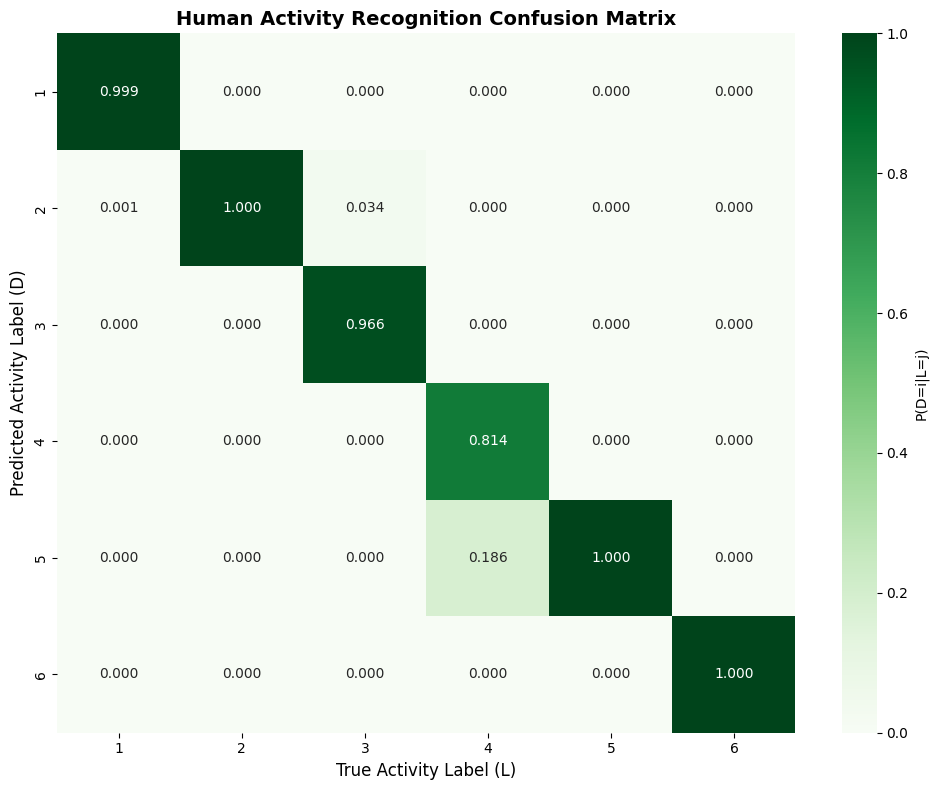

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(har_confusion, annot=True, fmt='.3f', cmap='Greens',
            xticklabels=[int(c) for c in har_classes], 
            yticklabels=[int(c) for c in har_classes],
            cbar_kws={'label': 'P(D=i|L=j)'})
plt.xlabel('True Activity Label (L)', fontsize=12)
plt.ylabel('Predicted Activity Label (D)', fontsize=12)
plt.title('Human Activity Recognition Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## PCA Visualization for HAR Dataset

Explained variance ratio (first 3 components): [0.62227069 0.04772595 0.04018191]
Cumulative explained variance: 0.7102


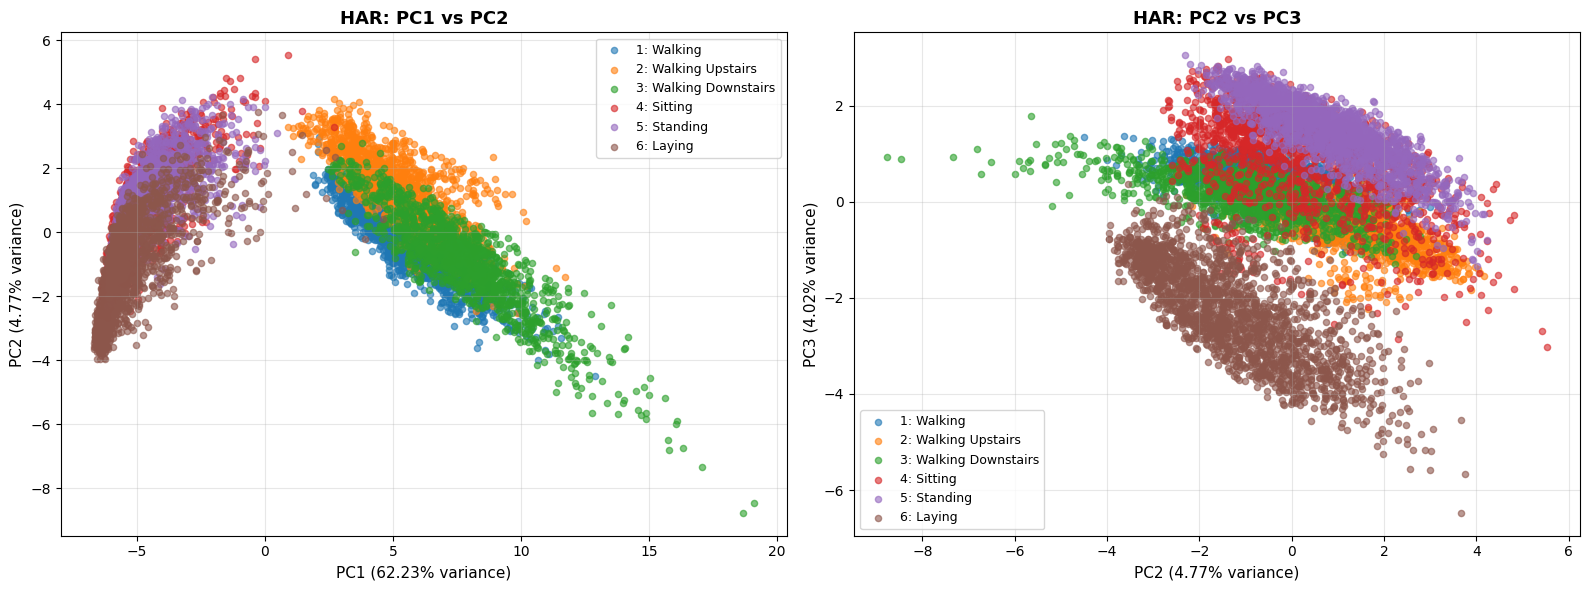

In [22]:
pca_har = PCA(n_components=3)
har_pca = pca_har.fit_transform(har_features)

print(f"Explained variance ratio (first 3 components): {pca_har.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.sum(pca_har.explained_variance_ratio_):.4f}")

# 2D visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

activity_names = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
                 4: 'Sitting', 5: 'Standing', 6: 'Laying'}

# PC1 vs PC2
for label in har_classes:
    mask = har_labels == label
    label_int = int(label)
    axes[0].scatter(har_pca[mask, 0], har_pca[mask, 1], 
                   label=f'{label_int}: {activity_names.get(label_int, "Activity")}', 
                   alpha=0.6, s=20)
axes[0].set_xlabel(f'PC1 ({pca_har.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca_har.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[0].set_title('HAR: PC1 vs PC2', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# PC2 vs PC3
for label in har_classes:
    mask = har_labels == label
    label_int = int(label)
    axes[1].scatter(har_pca[mask, 1], har_pca[mask, 2], 
                   label=f'{label_int}: {activity_names.get(label_int, "Activity")}', 
                   alpha=0.6, s=20)
axes[1].set_xlabel(f'PC2 ({pca_har.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[1].set_ylabel(f'PC3 ({pca_har.explained_variance_ratio_[2]:.2%} variance)', fontsize=11)
axes[1].set_title('HAR: PC2 vs PC3', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()